In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

In [3]:
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data["Adj Close"]*=1.1

In [7]:
data["MA_50"]=data["Close"].rolling(window=50).mean()

In [10]:
data["MA_100"]=data["Close"].rolling(window=100).mean()

In [11]:
data["MA_200"]=data["Close"].rolling(window=200).mean()

In [12]:
data.reset_index(inplace=True)

In [13]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_100,MA_200
0,2014-03-27,28.322241,28.322241,27.570307,27.846546,30.631201,262719,NaN,NaN,NaN
1,2014-03-28,27.983171,28.243956,27.857019,27.922838,30.715122,824257,NaN,NaN,NaN
2,2014-03-31,28.266893,28.272379,27.770258,27.772251,30.549476,216593,NaN,NaN,NaN
3,2014-04-01,27.859013,28.344681,27.859013,28.280355,31.108391,158434,NaN,NaN,NaN
4,2014-04-02,29.917362,30.158699,28.032537,28.272379,31.099617,2942055,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2447,2023-12-14,134.770004,135.035004,131.059998,133.199997,146.519997,29619100,134.873199,133.9441,123.464925
2448,2023-12-15,132.919998,134.830002,132.630005,133.839996,147.223996,58569400,134.830199,133.9859,123.672575
2449,2023-12-18,133.860001,138.380005,133.770004,137.190002,150.909003,25699800,134.799399,134.0591,123.888425
2450,2023-12-19,138.000000,138.770004,137.449997,138.100006,151.910007,20661000,134.771399,134.1100,124.101025


In [14]:
ma_100_days = data.Close.rolling(100).mean()

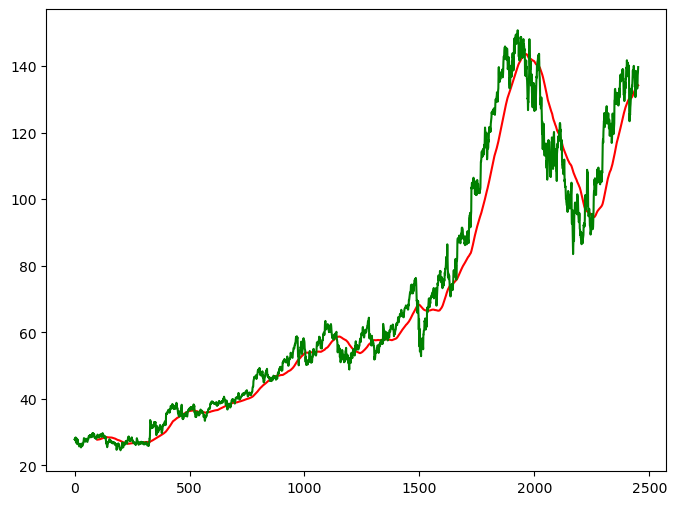

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [16]:
ma_200_days = data.Close.rolling(200).mean()

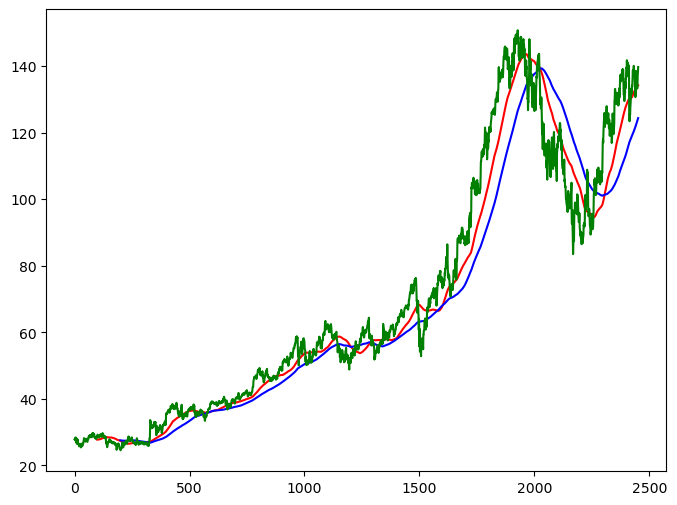

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()


In [18]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [20]:
data_train.shape[0]

1802

In [21]:
data_test.shape[0]

451

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_train_scale = scaler.fit_transform(data_train)

In [24]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [25]:
x, y = np.array(x), np.array(y)

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\ARJITA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - loss: 0.0620
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - loss: 0.0076
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - loss: 0.0058
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - loss: 0.0065
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - loss: 0.0050
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - loss: 0.0043
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - loss: 0.0049
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - loss: 0.0058
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - loss: 0.0049
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - loss: 0.0041
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 253ms/step - loss: 0.0037
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 249ms/step - loss: 0.0040
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 255ms/step - loss: 0.0040
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - loss: 0.0031
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 25

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [31]:
pas_100_days = data_train.tail(100)

In [32]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test_scale  =  scaler.fit_transform(data_test)

In [34]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [35]:
y_predict = model.predict(x)

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step


In [36]:
scale =1/scaler.scale_

In [37]:
y_predict = y_predict*scale

In [38]:
y = y*scale

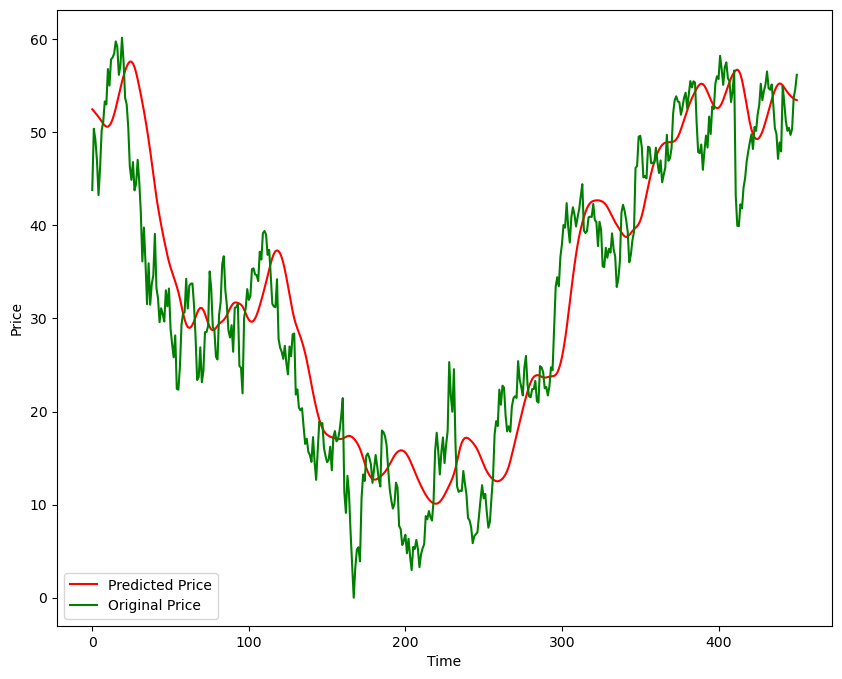

In [39]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stocks_final.keras')